# 第四章-最基础的分类算法-K近邻算法

## 4.1 K 近邻算法基础

## `KNN` 的过程
欧拉距离:
$$\sqrt{(x^{(a)}-x^{(b)})^{2}+(y^{(a)}-y^{(b)})^{2}}$$
$$\sqrt{(x^{(a)}-x^{(b)})^{2}+(y^{(a)}-y^{(b)})^{2}+(z^{(a)}-z^{(b)})^{2}}$$
$$\sqrt{(X^{(a)}_{1}-X^{(b)}_{1})^{2}+(X^{(a)}_{2}-X^{(b)}_{2})^{2}+...+(X^{(a)}_{n}-X^{(b)}_{n})^{2}}$$
$$\sqrt{\sum^{n}_{i=1}(X^{(a)}_{i}-X^{(b)}_{i})^{2}}$$

## 4.2 `scikit-learn` 中的机器学习算法封装

### 4.2.1 实现 `KNN` 的原理

In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#### 定义数据

In [45]:
# raw_data_x = np.random.randint(0, 10, 20).reshape((10, 2))
raw_data_x = np.array([[1,1],[7,8],[2,6],[2,3],[8,4],[3,4],[7,1],[1,3],[7,4],[7,8]])
raw_data_y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
print(raw_data_x.shape)
print(raw_data_y.shape)
x = np.array([8, 3])  # 定义一个点
print(x.shape)

(10, 2)
(10,)
(2,)


#### 使用散点图绘制定义的数据

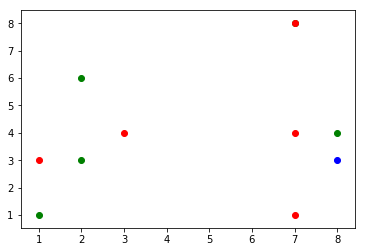

In [46]:
plt.scatter(raw_data_x[raw_data_y==0, 0], raw_data_x[raw_data_y==0, 1], color="g")
plt.scatter(raw_data_x[raw_data_y==1, 0], raw_data_x[raw_data_y==1, 1], color="r")
plt.scatter(x[0], x[1], color='b')
plt.show()

#### 实现 `KNN` 的计算过程

In [47]:
from math import sqrt
# distances = []
# for x_train in raw_data_x:
#     distances.append(sqrt(np.sum((x_train - x)**2)))
# 计算 x 这个点与坐标轴中每一个点的距离
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in raw_data_x]

# 将距离 distances 排序, np.argsort() 方法将返回排序(从小到大)后的索引值
nearest = np.argsort(distances)

# 定义 k 值
k = 6

# 根据排序后的 distances 找到前 K 个点对应的 y
topK_y = [raw_data_y[i] for i in nearest[:k]]
from collections import Counter
votes = Counter(topK_y)

# 找出票数最多的一个元素, 如果将1改成2, 则找出票数最多的2个元素
category = votes.most_common(1)
category[0][0]

1

### 4.2.2 封装 `KNN` 的算法过程

In [5]:
import numpy as np
from math import sqrt
from collections import Counter

In [6]:
def kNN_classify(k, x_train, y_train, x):
    # 如果 x_train.shape == (10, 2), 证明一共有10个点, k 值不能大于10
    assert 1 <= k <= x_train.shape[0], "K 必须大于1, 而且不能大于x_train.shape"
    # x_train.shape[0] 必须与 y_train.shape[0] 相同, 否则无法索引
    assert x_train.shape[0] == y_train.shape[0], "x_train.shape[0] = y_train.shape[0]"
    # 传进来的随机点 x.shape[0] 必须与 x_train.shape[1], 否则 x 不是一个点
    assert x_train.shape[1] == x.shape[0], "x_train.shape[1] == x.shape[0]"
    
    distances = [sqrt(np.sum((_x - x)**2)) for _x in x_train]
    nearest = np.argsort(distances)
    top_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(top_y)
    return votes.most_common(1)[0][0]

print(kNN_classify(k, raw_data_x, raw_data_y, x))

1


###  4.2.3 使用 `scikit-learn` 中的 `KNN`

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [9]:
kNN_classifier.fit(raw_data_x, raw_data_y)
x = np.array([8, 3]).reshape(1, -1)  # 必须将 x 转换为一个矩阵
kNN_classifier.predict(x)

array([1])

### 4.2.4 封装整理的 `KNN` 代码, 实现类似 `scikit-learn` 中的 `KNN`

In [51]:
class KNN_classifiter(object):
    
    def __init__(self, k):
        """初始化 KNN 分类器"""
        assert k >= 1, "k must be valid!"
        self.k = k
        self._x_train = None
        self._y_train = None
    
    def fit(self, x_train, y_train):
        """根据训练数据集 x_train y_train 训练 KNN 分类器"""
        
        # 传进来的随机点 x.shape[0] 必须与 x_train.shape[1], 否则 x 不是一个点
        assert x_train.shape[0] == y_train.shape[0], "x_train.shape[0] = y_train.shape[0]"
        # 如果 x_train.shape == (10, 2), 证明一共有10个点, k 值不能大于10
        assert 1 <= self.k <= x_train.shape[0], "K 必须大于1, 而且不能大于x_train.shape"
        
        self._x_train = x_train
        self._y_train = y_train
        
        return self
    
    def predict(self, x_predict):
        # 传进来的随机点 x.shape[0] 必须与 x_train.shape[1], 否则 x 不是一个点
        assert self._x_train.shape[1] == x_predict.shape[1], "x_train.shape[1] == x_predict.shape[0]"
        
        y_predict = [self._predict(x) for x in x_predict]
        
        return np.array(y_predict)
    
    def _predict(self, x):
        # 传进来的随机点 x.shape[0] 必须与 x_train.shape[1], 否则 x 不是一个点
        assert self._x_train.shape[1] == x.shape[0], "x_train.shape[1] == x.shape[0]"
        
        distances = [sqrt(np.sum((_x - x)**2)) for _x in self._x_train]
        nearest = np.argsort(distances)
        top_y = [self._y_train[i] for i in nearest[:k]]
        votes = Counter(top_y)
        
        return votes.most_common(1)[0][0]

In [52]:
knn_cli = KNN_classifiter(k=6)

In [53]:
knn_cli.fit(x_train=raw_data_x, y_train=raw_data_y)

In [54]:
x = np.array([[8, 3]]).reshape(1, 2)  # 必须将 x 转换为一个矩阵
print(x)

[[8 3]]


In [55]:
knn_cli.predict(x)

array([1])

## 4.3 训练数据集 与 测试数据集

### 4.3.1 将数据拆分为 训练数据集 与 测试数据集

<font face="Courier New">

将 `iris.data` 中所有的数据拆分为两个数据, 一个作为训练数据集, 一个作为测试数据集;<br>
方法一: 将数据集 x 与 y 使用 numpy 合并, 之后进行乱序排序, 取出 80% 做为数据集, 20% 做为测试集, 之后再将两者分离;<br>
方法二: 产生 len(x) 长度的数字做为 x 的索引, 将索引乱序排序, 取出 80% 做为数据集, 20% 做为测试集, 之后根据索引值找到对应的 y.<br>
本次使用方法二

In [65]:
import numpy as np
from sklearn import datasets  # 导入 sklearn 提供的数据集

iris = datasets.load_iris()  # 使用 sklearn 提供的鸢尾花数据集
x = iris.data       # 鸢尾花图片对应的数据集
y = iris.target     # 结果标签对应的向量
print(x.shape)
print(y.shape)

(150, 4)
(150,)


<font face="Courier New">

定义函数 `train_test_split` 对数据进行拆分

In [66]:
def train_test_split(x, y, train_ratio=0.8, seed=None):
    assert x.shape[0] == y.shape[0], "The size of x must be equal to the size of y !"
    assert 0 < train_ratio < 1, "The train must between 0 and 1 !"
    
    if seed:
        np.random.seed(seed)
    
    shuffle_indexs = np.random.permutation(len(x))  # 将生成的索引乱序排序
    train_ratio = train_ratio                       # 设置训练数据集比例
    train_size = int(train_ratio * len(x))          # 计算出训练数据集的大小

    train_indexs = shuffle_indexs[:train_size]  # 训练集 索引区间
    test_indexs = shuffle_indexs[train_size:]   # 测试集 索引区间
    
    X_train = x[train_indexs]    # 取出 训练集 x_train
    y_train = y[train_indexs]    # 取出 训练集 y_train
    X_test = x[test_indexs]      # 取出 测试集 x_test
    y_test = y[test_indexs]      # 取出 测试集 y_test
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x, y, 0.8)

**使用我们创建的 `KNN` 对数据进行预测**

In [67]:
knn_cli = KNN_classifiter(k = 6)
knn_cli.fit(X_train, y_train)
y_predict = knn_cli.predict(X_test) # 对 x_test 进行预测
equal_num = sum(y_predict == y_test)   # 计算出 y_predict 与 y_test 有多少个相同的元素
result = equal_num / len(y_test)
print(result)

0.9666666666666667


### 4.3.2 判断机器学习算法的性能

**使用 `sklearn` 中的 `KNN` 对数据进行预测**

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [70]:
kNN_classifier.fit(X_train, y_train)
y_predict = kNN_classifier.predict(X_test)
equal_num = sum(y_predict == y_test)
print(equal_num)
result = equal_num / len(y_test)
print(result)

29
0.9666666666666667


## 4.4 分类准确度

### 4.4.1 手写数字的识别

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [76]:
digits = datasets.load_digits()   # 手写数字数据集
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

`dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])`<br>
`data`: 表示所有手绘图片的数据集<br>
`target`: 表示每一张图片所属的类别<br>
`target_names`: 所有类别的名字<br>
`DESCR`: 描述信息 <br>